In [1]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from datetime import datetime as dt

# customer_master.csv       : 고객데이터, 이름, 성별 등
# item_master.csv           : 취급하는 상품 데이터, 상품명, 가격 등
# transaction_1.csv         : 구매내역 데이터
# transaction_2.csv          : transaction_1 과 같은 데이터 (transaction_1과 연결하여 사용)
# transaction_detail_1.csv   : 구매내역 상세 데이터
# transaction_detail_2.csv   : transaction_detail_1 과 같은 데이터 (transaction_detail_1과 연결하여 사용)

In [3]:
customer_master = pd.read_csv("D:/JDY_folder/jupyter_ws/databank/customer_master.csv")
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [4]:
item_master = pd.read_csv("D:/JDY_folder/jupyter_ws/databank/item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [5]:
transaction_1 = pd.read_csv("D:/JDY_folder/jupyter_ws/databank/transaction_1.csv")
transaction_2 = pd.read_csv("D:/JDY_folder/jupyter_ws/databank/transaction_2.csv")

In [6]:
transaction_detail_1 = pd.read_csv("D:/JDY_folder/jupyter_ws/databank/transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv("D:/JDY_folder/jupyter_ws/databank/transaction_detail_2.csv")

In [8]:
transaction = pd.concat([transaction_1, transaction_2])
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2])
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [9]:
transaction.to_csv('D:/JDY_folder/jupyter_ws/databank/transaction.csv', encoding='utf-8-sig')

In [10]:
transaction_detail.to_csv('D:/JDY_folder/jupyter_ws/databank/transaction_detail.csv', encoding='utf-8-sig')

In [11]:
print(len(transaction))
print(len(transaction_detail))

6786
7144


## 판매 데이터(transaction, transaction_detail)끼리 merge

In [12]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date","customer_id"]], on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [13]:
print(len(join_data))

7144


## customer_master와 join_data를 merge

In [14]:
join_data_customer = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data_customer

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시
7140,7140,T0000006895,S002,1,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시
7141,7141,T0000006896,S001,2,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시
7142,7142,T0000006897,S002,1,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시


In [15]:
join_data_item = pd.merge(join_data, item_master, on="item_id", how="left")
join_data_item.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000


In [16]:
join_data_customer.to_csv('D:/JDY_folder/jupyter_ws/databank/join_customer.csv', encoding='utf-8-sig')
join_data_item.to_csv('D:/JDY_folder/jupyter_ws/databank/join_data_item.csv', encoding='utf-8-sig')

In [ ]:
## join_data_item에 열추가

In [17]:
join_data_item["price"] = join_data_item["quantity"]*join_data_item["item_price"]
join_data_item.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,170000


In [18]:
join_data_item.to_csv('D:/JDY_folder/jupyter_ws/databank/join_data_item.csv', encoding='utf-8-sig')

In [19]:
join_data_item["price"].sum()

971135000

In [20]:
transaction["price"].sum()

971135000

#### 각종 통계량 탐색

In [21]:
join_data_item.isnull().sum()

detail_id         0
transaction_id    0
item_id           0
quantity          0
payment_date      0
customer_id       0
item_name         0
item_price        0
price             0
dtype: int64

In [22]:
join_data_item.describe()

,detail_id,quantity,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,135937.150056
std,2062.439494,0.513647,64571.311830,68511.453297
min,0.000000,1.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,210000.000000
max,7143.000000,4.000000,210000.000000,420000.000000


In [23]:
join_data_item["payment_date"].min()

'2019-02-01 01:36:57'

In [24]:
join_data_item["payment_date"].max()

'2019-07-31 23:41:38'

In [26]:
join_data_item.dtypes

detail_id          int64
transaction_id    object
item_id           object
quantity           int64
payment_date      object
customer_id       object
item_name         object
item_price         int64
price              int64
dtype: object

#### 월별 데이터 집계

In [27]:
join_data_item["payment_date"]=pd.to_datetime(join_data_item["payment_date"])
join_data_item.dtypes

detail_id                  int64
transaction_id            object
item_id                   object
quantity                   int64
payment_date      datetime64[ns]
customer_id               object
item_name                 object
item_price                 int64
price                      int64
dtype: object

In [28]:
join_data_item["payment_month"] = join_data_item["payment_date"].dt.strftime("%Y%m")
join_data_item.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price,price,payment_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000,210000,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000,50000,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000,120000,201902
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000,210000,201902
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000,170000,201902


In [30]:
join_data_item.groupby("payment_month")["price"].sum()

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [31]:
table_a = pd.pivot_table(join_data_item, index="item_name", columns="payment_month", values="quantity", aggfunc="sum")
table_a

payment_month,201902,201903,201904,201905,201906,201907
item_name,,,,,,
PC-A,483,520,518,497,520,505
PC-B,297,300,276,298,282,332
PC-C,165,159,183,171,182,162
PC-D,173,143,135,144,160,145
PC-E,285,305,309,280,302,341


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='payment_month', ylabel='item_name'>

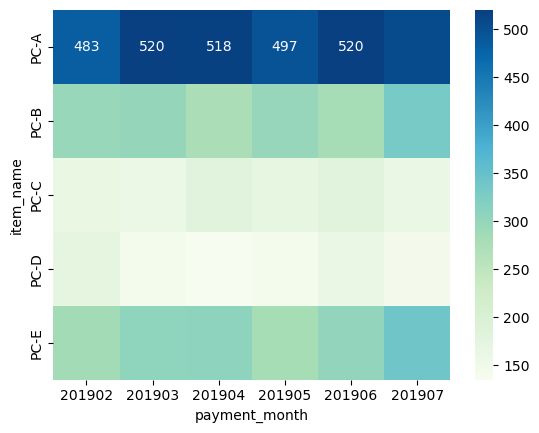

In [33]:
sns.heatmap(table_a, annot=True, cmap="GnBu", cbar=True, fmt="d")

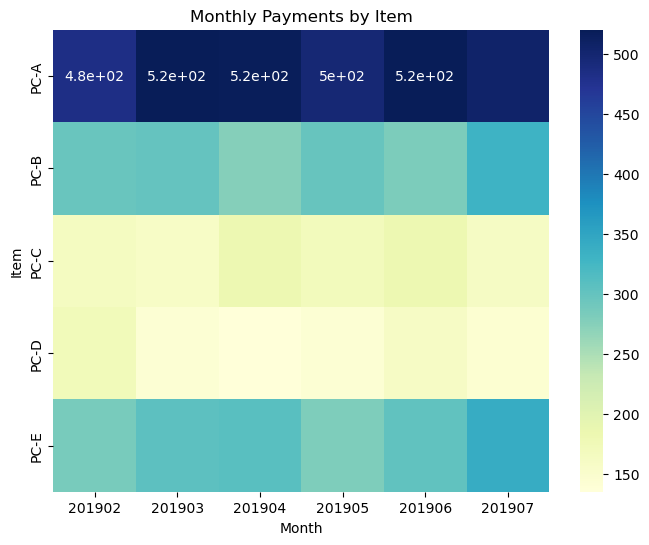

In [35]:
#### ChatGPT's graph
plt.figure(figsize=(8, 6))
sns.heatmap(table_a, annot=True, cmap='YlGnBu')
plt.title('Monthly Payments by Item')
plt.xlabel('Month')
plt.ylabel('Item')
plt.show()

#### 월별/상품별 데이터 집계

In [36]:
join_data_item.groupby(["payment_month","item_name"])[["price","quantity"]].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [37]:
table_b = pd.pivot_table(join_data_item, index="item_name", columns="payment_month", values=["price","quantity"], aggfunc="sum")
table_b

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

#### 상품별 매출 추이

In [38]:
graph_data = pd.pivot_table(join_data_item, index="payment_month", columns="item_name", values="price", aggfunc="sum")
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


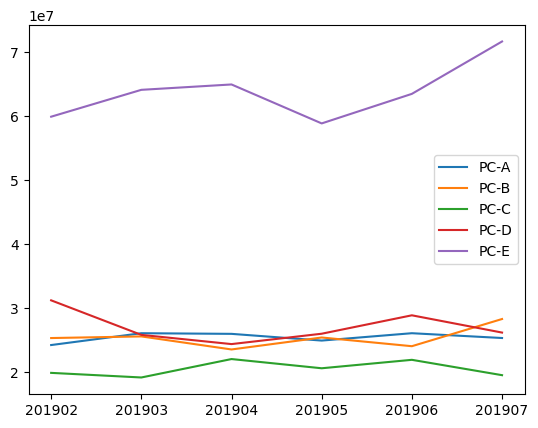

In [39]:
import matplotlib.pyplot as plt
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()